In [1]:
train_dir = './flower_dataset/Train'
test_dir = './flower_dataset/Test'

In [3]:
import os
from PIL import Image, UnidentifiedImageError

class_names = sorted(os.listdir(train_dir))
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [4]:
corrupted_images = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_name):
        images = os.listdir(class_path)

        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")


No corrupted images found.


In [5]:
# Dictionary to store class counts
class_counts = {}
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png','.jpg','.jpeg'))]
        class_counts[class_name] = len(images)

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)

for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")


Class Distribution:
Class Name               Valid Image Count
daisy                                763
dandelion                           1051
rose                                 783
sunflower                            732
tulip                                983


In [6]:
import random

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir,class_name)

    if(os.path.isdir(class_path)):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', 'jpeg'))]

        if images:
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

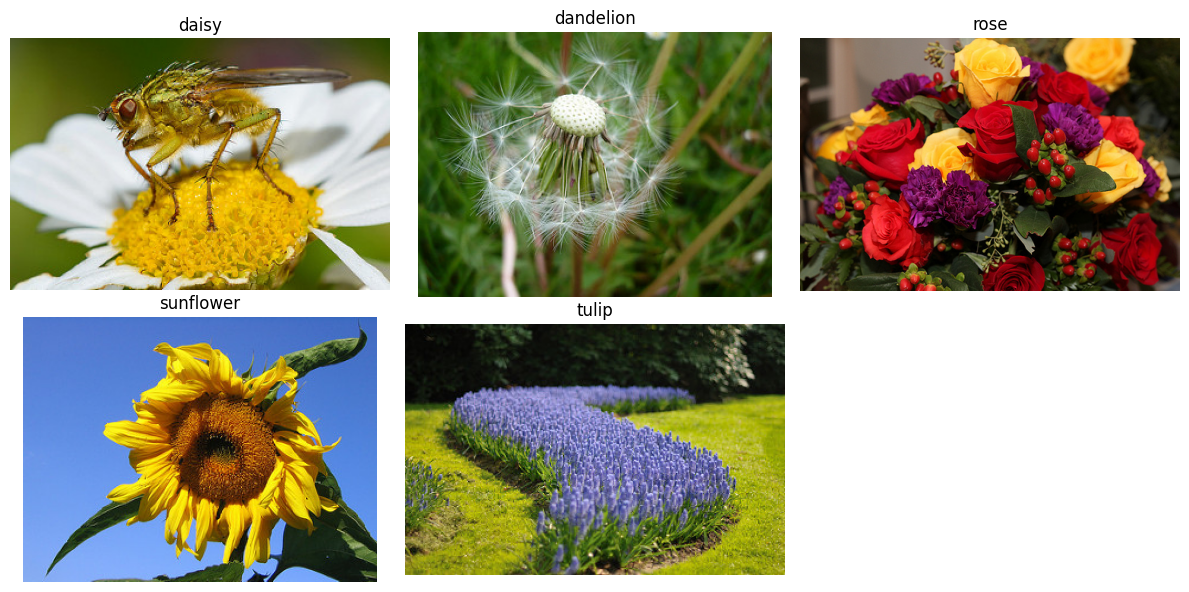

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

num_classes = len(selected_images)

cols = (num_classes + 1) // 2
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(12,6))

for i, ax in enumerate(axes.flat):

    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)

        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()